In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


590

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | lompoc
Processing Record 2 of Set 12 | piacabucu
Processing Record 3 of Set 12 | cururupu
Processing Record 4 of Set 12 | tshikapa
Processing Record 5 of Set 12 | chuy
Processing Record 6 of Set 12 | castro
Processing Record 7 of Set 12 | trincomalee
Processing Record 8 of Set 12 | ganta
Processing Record 9 of Set 12 | aljezur
Processing Record 10 of Set 12 | tiksi
Processing Record 11 of Set 12 | oranjemund
Processing Record 12 of Set 12 | kapaa
Processing Record 13 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 14 of Set 12 | ocean city
Processing Record 15 of Set 12 | atuona
Processing Record 16 of Set 12 | ushuaia
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | rikitea
Processing Record 19 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 12 | sumoto
Processing Record 21 of Set 12 | nikolskoye
Processing R

Processing Record 31 of Set 15 | honiara
Processing Record 32 of Set 15 | buin
Processing Record 33 of Set 15 | san cristobal
Processing Record 34 of Set 15 | canora
Processing Record 35 of Set 15 | pochutla
Processing Record 36 of Set 15 | torrington
Processing Record 37 of Set 15 | tautira
Processing Record 38 of Set 15 | golden gate
Processing Record 39 of Set 15 | hofn
Processing Record 40 of Set 15 | miraflores
Processing Record 41 of Set 15 | sechura
Processing Record 42 of Set 15 | nong khae
Processing Record 43 of Set 15 | yellowknife
Processing Record 44 of Set 15 | broome
Processing Record 45 of Set 15 | robertsport
Processing Record 46 of Set 15 | ikwiriri
Processing Record 47 of Set 15 | faanui
Processing Record 48 of Set 15 | fortuna
Processing Record 49 of Set 15 | dunedin
Processing Record 50 of Set 15 | necochea
Processing Record 1 of Set 16 | brasilia
Processing Record 2 of Set 16 | dikson
Processing Record 3 of Set 16 | bouar
Processing Record 4 of Set 16 | tsaratanan

Processing Record 16 of Set 19 | sonari
Processing Record 17 of Set 19 | wageningen
Processing Record 18 of Set 19 | sun valley
Processing Record 19 of Set 19 | fairbanks
Processing Record 20 of Set 19 | zhigansk
Processing Record 21 of Set 19 | fairfield
Processing Record 22 of Set 19 | vestmannaeyjar
Processing Record 23 of Set 19 | bitung
Processing Record 24 of Set 19 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 19 | luderitz
Processing Record 26 of Set 19 | mlimba
Processing Record 27 of Set 19 | marathon
Processing Record 28 of Set 19 | adrar
Processing Record 29 of Set 19 | tiznit
Processing Record 30 of Set 19 | port moresby
Processing Record 31 of Set 19 | roald
Processing Record 32 of Set 19 | miyako
Processing Record 33 of Set 19 | ishinomaki
Processing Record 34 of Set 19 | boda
Processing Record 35 of Set 19 | heishan
Processing Record 36 of Set 19 | bela
Processing Record 37 of Set 19 | orcopampa
Processing Record 38 of Set 19 | pisco
Processing Re

Processing Record 3 of Set 23 | traralgon
Processing Record 4 of Set 23 | ulaangom
Processing Record 5 of Set 23 | north myrtle beach
Processing Record 6 of Set 23 | puro
Processing Record 7 of Set 23 | northam
Processing Record 8 of Set 23 | inverness
Processing Record 9 of Set 23 | yazman
Processing Record 10 of Set 23 | iisalmi
Processing Record 11 of Set 23 | hays
Processing Record 12 of Set 23 | nizhniy tsasuchey
Processing Record 13 of Set 23 | bairiki
Processing Record 14 of Set 23 | kapit
Processing Record 15 of Set 23 | kenai
Processing Record 16 of Set 23 | kargasok
Processing Record 17 of Set 23 | colonial park
Processing Record 18 of Set 23 | boyolangu
Processing Record 19 of Set 23 | noshiro
Processing Record 20 of Set 23 | bilibino
Processing Record 21 of Set 23 | esmeralda
Processing Record 22 of Set 23 | araouane
Processing Record 23 of Set 23 | ishigaki
Processing Record 24 of Set 23 | lagoa
Processing Record 25 of Set 23 | dalbandin
Processing Record 26 of Set 23 | bo

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,50.56,89,40,4.61,US,2022-02-04 06:01:52
1,Piacabucu,-10.4056,-36.4344,76.80,77,72,7.05,BR,2022-02-04 06:04:52
2,Cururupu,-1.8283,-44.8683,73.69,98,93,3.09,BR,2022-02-04 06:04:53
3,Tshikapa,-6.4167,20.8000,67.41,96,100,2.19,CD,2022-02-04 06:04:53
4,Chuy,-33.6971,-53.4616,69.30,96,100,5.82,UY,2022-02-04 06:04:54
5,Castro,-24.7911,-50.0119,64.29,98,99,2.66,BR,2022-02-04 06:03:47
6,Trincomalee,8.5711,81.2335,79.09,65,7,6.24,LK,2022-02-04 06:04:54
7,Ganta,7.3022,-8.5308,60.37,52,1,2.04,LR,2022-02-04 06:04:55
8,Aljezur,37.3191,-8.8033,56.53,56,97,5.97,PT,2022-02-04 06:04:56
9,Tiksi,71.6872,128.8694,-11.90,100,100,5.53,RU,2022-02-04 06:04:56


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

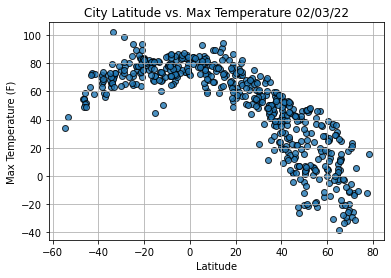

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()